# IPL Cricket League Data Analysis

## Contents :
- Importing packages
- Importing datasets
- Exploratory Data Analysis
    - Understanding the dataset
    - Describing dataset
    - Handling null values
    - Checking outliers
    - Finding correlation
- Exporting cleaned dataset
- Dataset source


## Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importing datasets

### Import ball by ball 2008-2020 dataset

In [2]:
ball=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

### Import all matches 2008-2020 dataset

In [3]:
matches = pd.read_csv('IPL Matches 2008-2020.csv')

## Exploratory Data Analysis 

### Getting to know the dataset

In [4]:
print("number of rows in ball dataset = ",ball.shape[0])
print("number of columns in ball dataset = ",ball.shape[1])

number of rows in ball dataset =  193468
number of columns in ball dataset =  18


In [5]:
print("number of rows in matches dataset = ",matches.shape[0])
print("number of columns in matches dataset = ",matches.shape[1])

number of rows in matches dataset =  816
number of columns in matches dataset =  17


In [6]:
ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [7]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


### Getting rid of irrelevant columns

In [8]:
matches['eliminator'].value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

In [9]:
matches.drop(['eliminator'],axis=1).head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,NaN,Aleem Dar,GA Pratapkumar


### Adding a new column - 'year' for simpler data analysis

In [10]:
matches['date'] = pd.to_datetime(matches['date']) 
matches['year'] = matches['date'].dt.year   

In [11]:
ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [12]:
matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'year'],
      dtype='object')

### Describing Dataset

In [13]:
ball.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [14]:
matches.describe()

,id,neutral_venue,result_margin,year
count,8.160000e+02,816.000000,799.000000,816.000000
mean,7.563496e+05,0.094363,17.321652,2013.926471
std,3.058943e+05,0.292512,22.068427,3.665054
min,3.359820e+05,0.000000,1.000000,2008.000000
25%,5.012278e+05,0.000000,6.000000,2011.000000
50%,7.292980e+05,0.000000,8.000000,2014.000000
75%,1.082626e+06,0.000000,19.500000,2017.000000
max,1.237181e+06,1.000000,146.000000,2020.000000


### Handling null values

In [15]:
ball.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [16]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
year                 0
dtype: int64

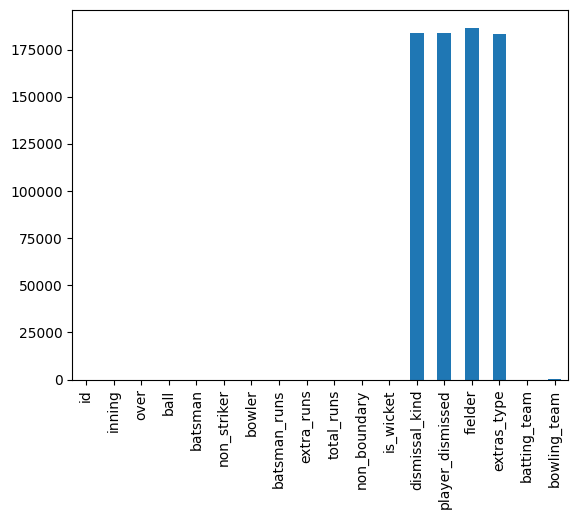

In [17]:
ball.isnull().sum().plot(kind='bar')
plt.show()

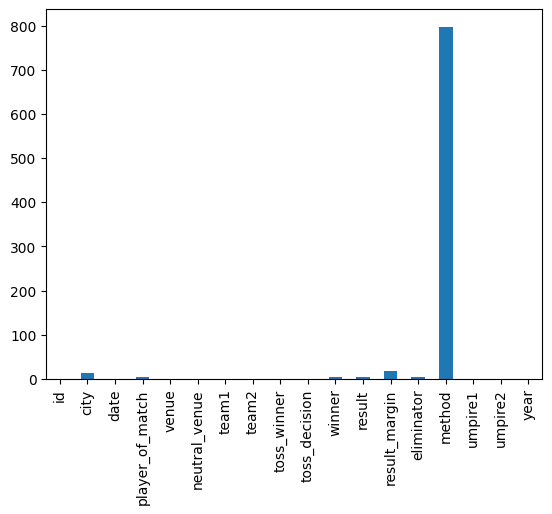

In [18]:
matches.isnull().sum().plot(kind='bar')
plt.show()

## Since there exists significant null values in 4 columns. lets drop it

In [19]:
ball = ball.drop(['dismissal_kind','player_dismissed','fielder','extras_type'], axis=1)

In [20]:
ball = ball.dropna(subset=['bowling_team'])

In [21]:
ball.isnull().sum()

id              0
inning          0
over            0
ball            0
batsman         0
non_striker     0
bowler          0
batsman_runs    0
extra_runs      0
total_runs      0
non_boundary    0
is_wicket       0
batting_team    0
bowling_team    0
dtype: int64

## similarly do for matches dataset

In [22]:
matches = matches.drop(['method'],axis=1)

In [23]:
matches = matches.dropna(subset=['city','result_margin','eliminator','player_of_match','winner','result'])

In [24]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
year               0
dtype: int64

### Check for duplicates

In [25]:
ball.duplicated().sum()

1

In [26]:
matches.duplicated().sum()

0

### Check for outliers

<AxesSubplot: >

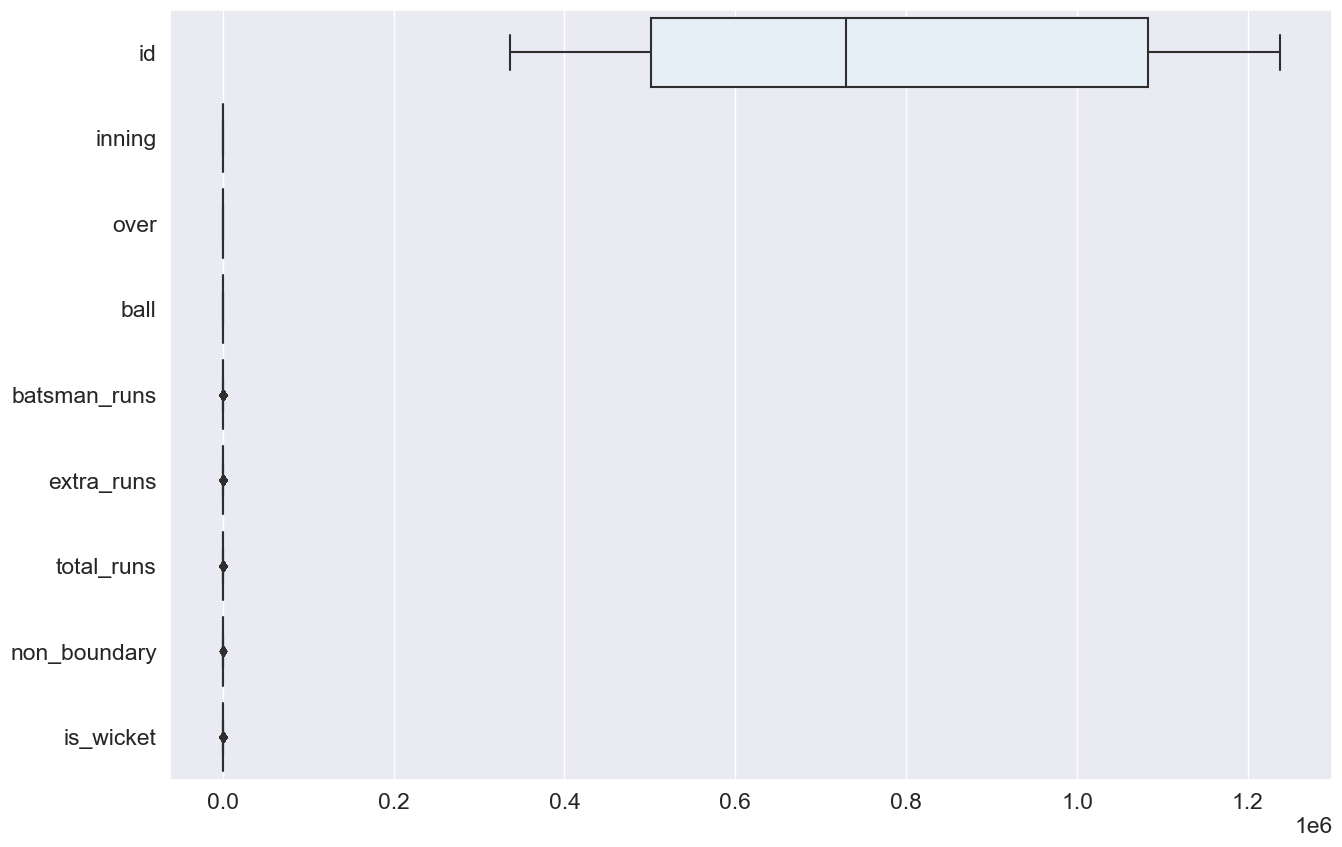

In [27]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.boxplot(data = ball , palette='Blues', orient = 'h')

<AxesSubplot: >

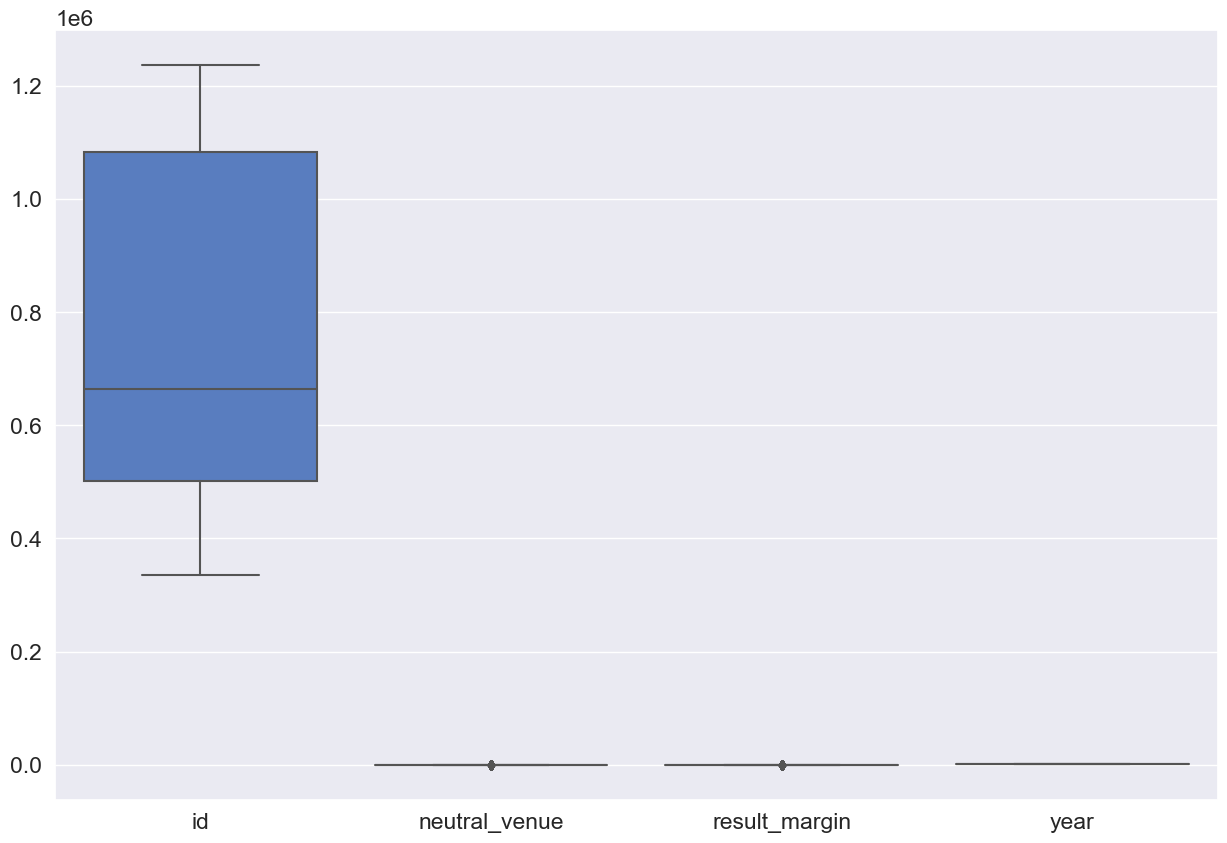

In [28]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.boxplot(data = matches , palette='muted', orient = 'v')

#### There exists no outliers

### Finding correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_37308\3305257369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ball = ball.corr().round(2)


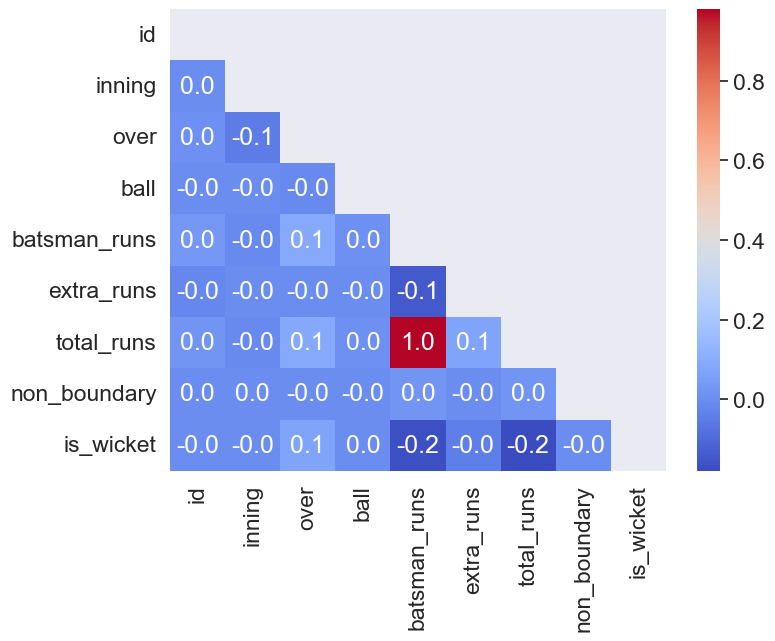

In [46]:
corr_ball = ball.corr().round(2)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_ball, dtype=bool))

# Set the figure size for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_ball, annot=True, fmt='.1f', cmap='coolwarm', ax=ax, mask=mask)

# Display the plot
plt.show()

#### Observation
- Total runs and batsman runs are highly correlated (directly proportional
- is_wicket is east correlated with total runs and batsman runs (inversely proportional)


### Let's replace long teams names to abbreviations

In [37]:
replace_dict = {'Rising Pune Supergiant':'Rising Pune Supergiants'}

In [38]:
ball.replace(replace_dict, inplace=True)
matches.replace(replace_dict, inplace=True)

In [39]:
replace_dict2 = {'Royal Challengers Bangalore': 'RCB', 'Mumbai Indians': 'MI', 'Chennai Super Kings': 'CSK','Kolkata Knight Riders':
                'KKR','Kings XI Punjab':'KX1P','Delhi Capitals':'DC','Sunrisers Hyderabad':'SRH',
                'Deccan Chargers':'DCC','Delhi Daredevils':'DD','Gujarat Lions':'GL','Kochi Tuskers Kerala':'KTK',
                'Rising Pune Supergiants':'RPSG','Rajasthan Royals':'RR','Pune Warriors':'PW'}

In [40]:
ball.replace(replace_dict2, inplace=True)
matches.replace(replace_dict2, inplace=True)

## Finally, Export the cleaned dataset

In [41]:
ball.to_csv('ball-by-ball-2008-2020.csv',index=False)

In [42]:
matches.to_csv('matches-2008-2020.csv',index=False)

## Dataset source

https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020